# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
%matplotlib inline

# Importing the dataset

In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Checking for any null values

In [ ]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.rename(columns={"family_history_with_overweight":"overweight_hist"})


,Gender,Age,Height,Weight,overweight_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Checking the values for float and oject variables

In [ ]:
num_features = tuple(df.select_dtypes(include=['float64']).columns)
cat_features = tuple(df.select_dtypes(include=['object']).columns)
for col in num_features:
    print(f'{col} value counts')
    print(df[col].value_counts())
    print()

Age value counts
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64

Height value counts
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64

Weight value counts
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Length: 1525, dtype: int64

FCVC value counts
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64

NCP value counts
3.000000    1203
1.000000     1

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Converting text variables to category variables

In [ ]:
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [ ]:
def variable_counts(columns, stage):
    for col in columns:    
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())


# Rounding off the float values to nearest integer

In [ ]:
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]
variable_counts(columns, 'pre')
for col in columns:
    df[col] = round(df[col]).astype('int')  
print("")
variable_counts(columns, 'post')


Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


# Mapping binary variables to 0 and 1 values

In [ ]:
data_1 = df[['Gender', 'family_history_with_overweight',
          'FAVC','SMOKE', 'SCC']]
df['family_history_with_overweight'] = data_1['family_history_with_overweight'].map({'yes':1,'no':0})
df['Gender'] = data_1['Gender'].map({'Male':1,'Female':0})
df['FAVC'] = data_1['FAVC'].map({'yes':1,'no':0})
df['SMOKE'] = data_1['SMOKE'].map({'yes':1,'no':0})
df['SCC'] = data_1['SCC'].map({'yes':1,'no':0})

# Encoding ordinal variables

In [ ]:
ord_encoders = {}
ordinal_variables = ('CAEC','CALC')
ordinal_values = [(('no','Sometimes','Frequently','Always'),),
           (('no','Sometimes','Frequently','Always'),),
            (('Insufficient_Weight','Normal_Weight','Overweight_Level_I',
             'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),)]
for i,key in enumerate(ordinal_variables):
    print(key,ordinal_values[i])
    ord_encoders[key] = OrdinalEncoder(categories=ordinal_values[i])
    ord_encoders[key].fit(np.asarray(df[key]).reshape(-1,1))
    col = 'ordinal_'+key
    df[col] = ord_encoders[key].transform(np.asarray(df[key]).reshape(-1,1))

CAEC (('no', 'Sometimes', 'Frequently', 'Always'),)
CALC (('no', 'Sometimes', 'Frequently', 'Always'),)


# One Hot Encode of MTRANS variable

In [ ]:

df = pd.concat([df,pd.get_dummies(df.MTRANS).add_prefix('MTRANS_')],axis=1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC,MTRANS,NObeyesdad,ord_CAEC,ord_CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2,3,Sometimes,0,...,no,Public_Transportation,Normal_Weight,1.0,0.0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3,3,Sometimes,1,...,Sometimes,Public_Transportation,Normal_Weight,1.0,1.0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2,3,Sometimes,0,...,Frequently,Public_Transportation,Normal_Weight,1.0,2.0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3,3,Sometimes,0,...,Frequently,Walking,Overweight_Level_I,1.0,2.0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2,1,Sometimes,0,...,Sometimes,Public_Transportation,Overweight_Level_II,1.0,1.0,0,0,0,1,0


In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'ord_CAEC', 'ord_CALC',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

# Combining the target variable with the remaining transformed dataset

In [ ]:
x_cols = ['Gender', 'Age','Height', 'Weight','family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'ord_CAEC',
          'ord_CALC','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
          'MTRANS_Public_Transportation', 'MTRANS_Walking']
df[['NObeyesdad'] + x_cols]

,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,SCC,FAF,TUE,ord_CAEC,ord_CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,0,21.000000,1.620000,64.000000,1,0,2,3,0,...,0,0,1,1.0,0.0,0,0,0,1,0
1,Normal_Weight,0,21.000000,1.520000,56.000000,1,0,3,3,1,...,1,3,0,1.0,1.0,0,0,0,1,0
2,Normal_Weight,1,23.000000,1.800000,77.000000,1,0,2,3,0,...,0,2,1,1.0,2.0,0,0,0,1,0
3,Overweight_Level_I,1,27.000000,1.800000,87.000000,0,0,3,3,0,...,0,2,0,1.0,2.0,0,0,0,0,1
4,Overweight_Level_II,1,22.000000,1.780000,89.800000,0,0,2,1,0,...,0,0,0,1.0,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Obesity_Type_III,0,20.976842,1.710730,131.408528,1,1,3,3,0,...,0,2,1,1.0,1.0,0,0,0,1,0
2107,Obesity_Type_III,0,21.982942,1.748584,133.742943,1,1,3,3,0,...,0,1,1,1.0,1.0,0,0,0,1,0
2108,Obesity_Type_III,0,22.524036,1.752206,133.689352,1,1,3,3,0,...,0,1,1,1.0,1.0,0,0,0,1,0
2109,Obesity_Type_III,0,24.361936,1.739450,133.346641,1,1,3,3,0,...,0,1,1,1.0,1.0,0,0,0,1,0


# Plotting Categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


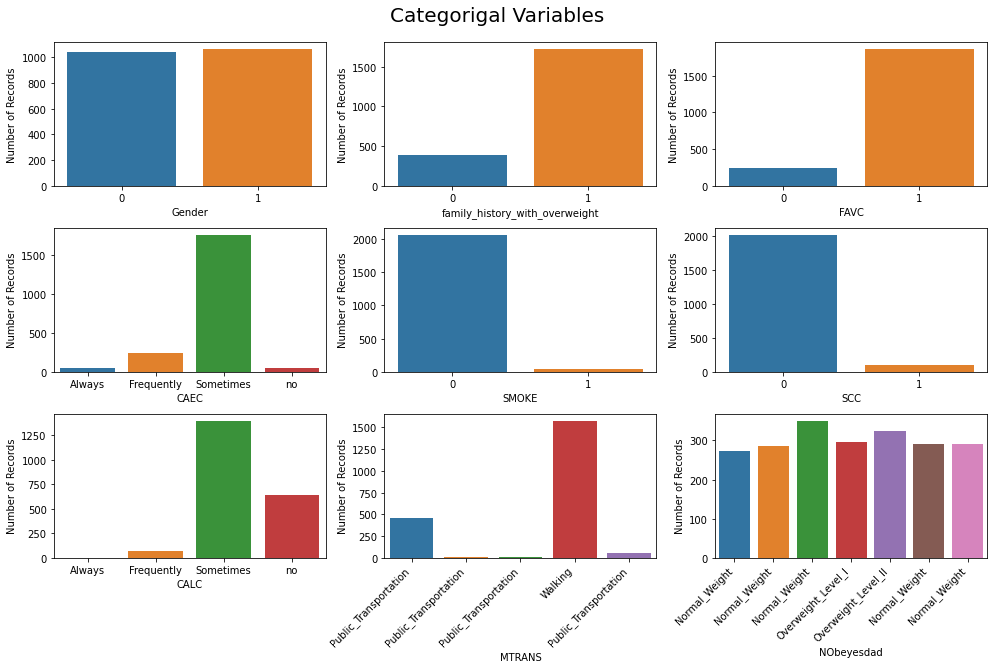

In [ ]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.MTRANS)        
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(df[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()



# plotting Ordinal Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

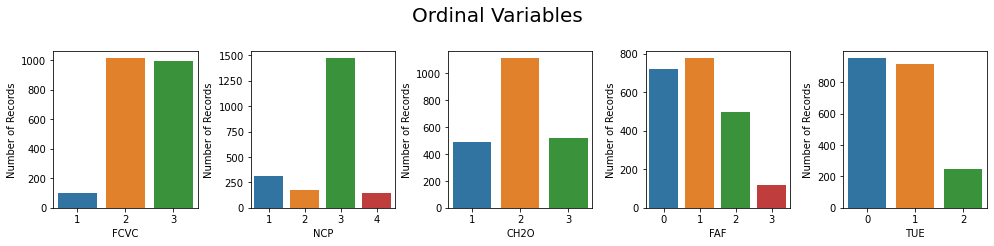

In [ ]:
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.9, h_pad=0.3)
plt.show()

# Plotting distribution of Numeric Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


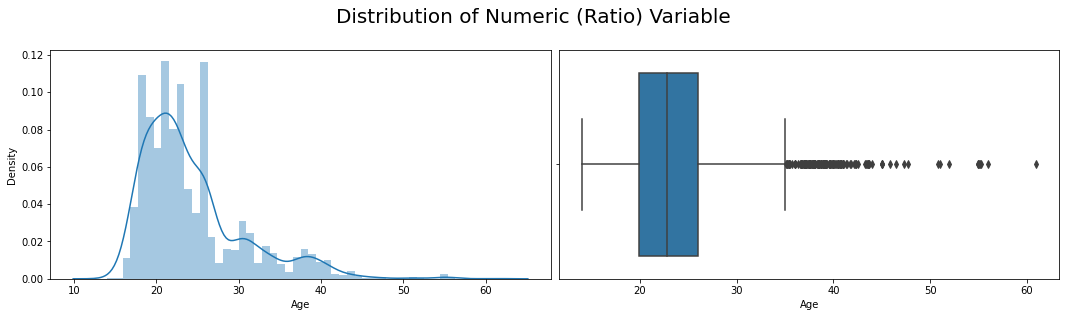

In [ ]:
fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(df["Age"], kde=True)

#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(df.Age)

# show figure & plots
fig.suptitle("Distribution of Numeric (Ratio) Variable", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()


# Plotting target variable

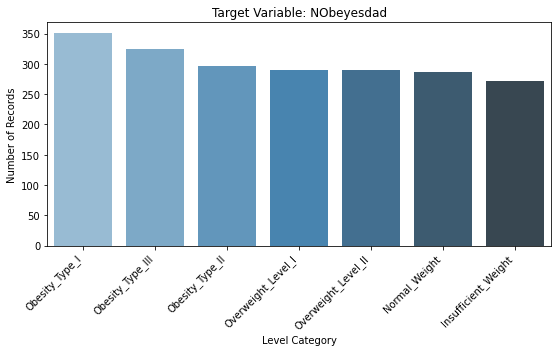

In [ ]:
# create figure
fig = plt.figure(figsize=(15, 5))

axis = fig.add_subplot(121)

# rotate axis label
axis.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)

# Set title text
axis.title.set_text("Target Variable: NObeyesdad")

# define second plot
sns.countplot(x="NObeyesdad",                  
                 palette="Blues_d", 
                 order=df.NObeyesdad.value_counts().index,
                 ax = axis,
                 data=df)

# labels for x and y
axis.xaxis.label.set_text("Level Category")
axis.yaxis.label.set_text("Number of Records")

# show figure & plots
plt.tight_layout()
plt.show()

# Splitting the dataset into X and y

In [ ]:
X = df[x_cols]
y = df['NObeyesdad']

# Making train test split

In [ ]:
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Plotting heat map

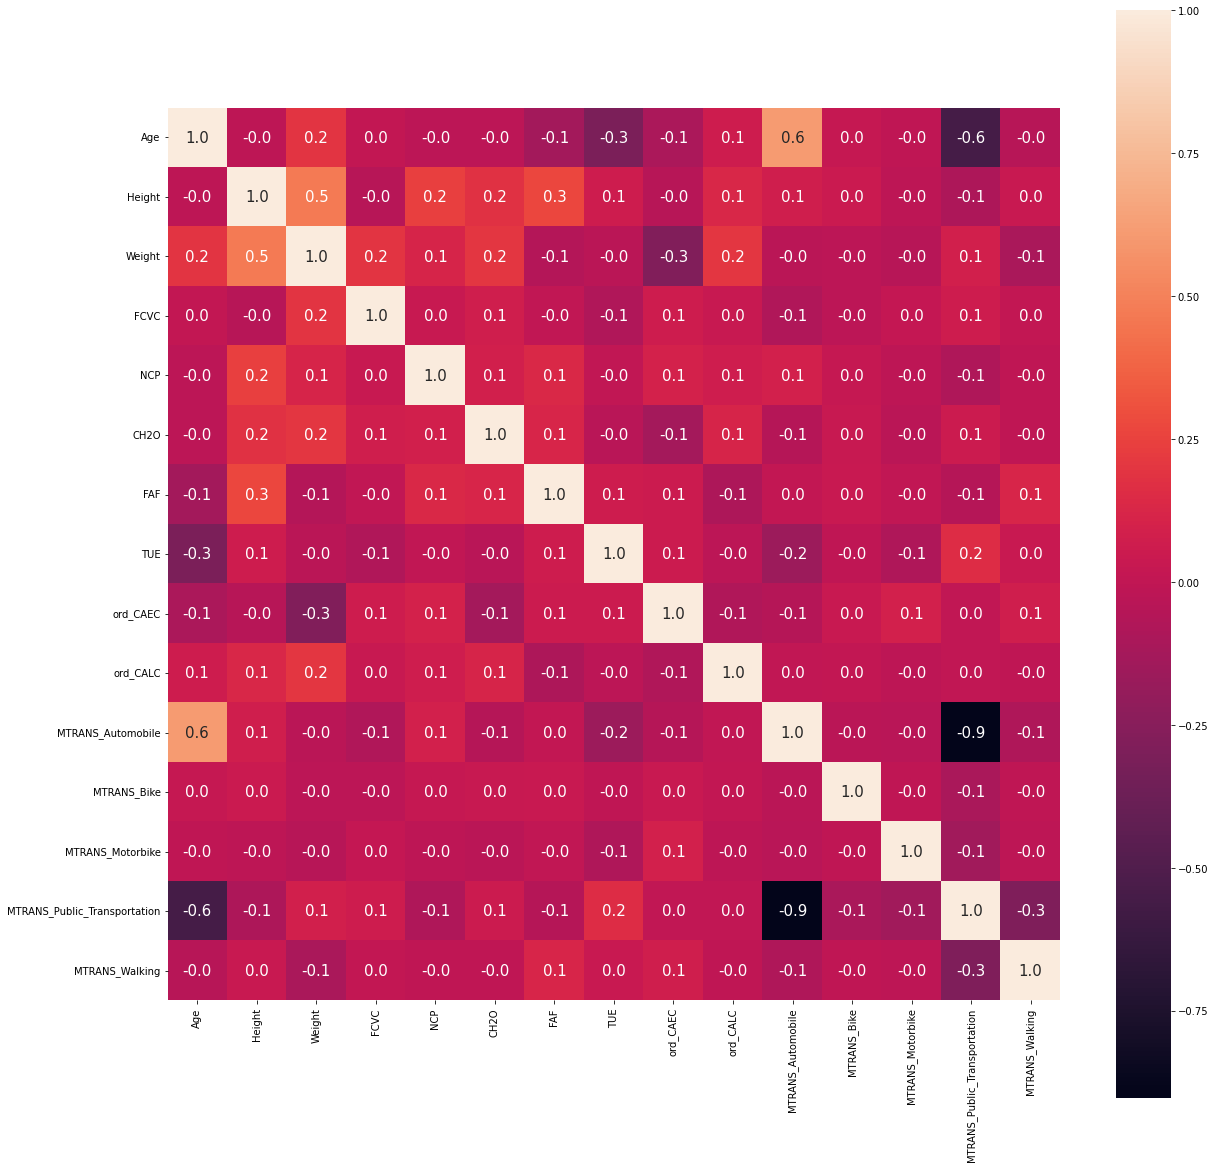

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,20))
#_=sns.heatmap(X_train.corr(), annot = True,linewidths=.5)
sns.heatmap(X_train.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RVC
scaler = MinMaxScaler()
df[x_cols] = scaler.fit_transform(df[x_cols])
df[x_cols].head()
model_1 = RVC()
model_1.fit(X_train,y_train)

RandomForestClassifier()

# Plotiing top 10 important features

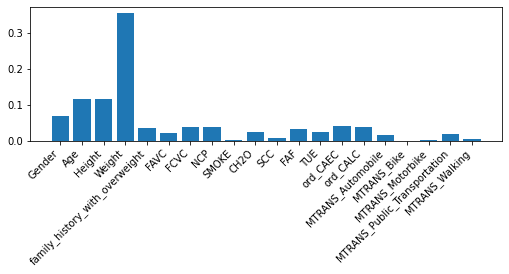

In [ ]:
fig = plt.figure(figsize=(15, 5))

axis = fig.add_subplot(121)
plt.bar( range(len(model_1.feature_importances_)), model_1.feature_importances_)
axis.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)

plt.xticks(range(len(model_1.feature_importances_)), X_train.columns)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

# Displaying the classification report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred1 = model_1.predict(X_test)
print("Classification Report: \n\n",classification_report(y_test, y_pred1))
print("Accuracy: ",accuracy_score(y_test, y_pred1))

Classification Report: 

                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.95      0.95        92
      Normal_Weight       0.78      0.90      0.83        77
     Obesity_Type_I       0.96      0.93      0.95       114
    Obesity_Type_II       0.98      0.99      0.98        85
   Obesity_Type_III       1.00      1.00      1.00        92
 Overweight_Level_I       0.93      0.83      0.88        89
Overweight_Level_II       0.90      0.91      0.90        85

           accuracy                           0.93       634
          macro avg       0.93      0.93      0.93       634
       weighted avg       0.93      0.93      0.93       634

Accuracy:  0.9290220820189274


# Hyperparameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning(name, clf, parameters): 
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    print (search.best_params_)
   

In [ ]:
n_estimators = [2**i for i in range(3,8)]
criterion = ['gini','entropy']
max_features = ['auto', 'sqrt']
max_depth = [8, 16,32,64]
max_depth.append(None)
min_samples_split = [2,3,4,5]
min_samples_leaf = [2,3,4,5]
bootstrap = [True, False]
# random state
random_state = [42]

parameters = {
              'n_estimators': n_estimators,
              'max_depth':max_depth,
              'max_features':max_features,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              #'bootstrap': bootstrap        
               }


hyperparameter_tuning('Random Forest',
           model_1, parameters)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
{'max_depth': 32, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 128}


# Calculating the classification report for the tuned hyperparameters

In [ ]:
clf = RVC(criterion='gini',
               n_estimators=128,
              max_depth = 32,            
              max_features='sqrt',
              min_samples_leaf =1,
              min_samples_split=2,
              random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Classification Report: \n\n",classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))

Classification Report: 

                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.95      0.95        92
      Normal_Weight       0.79      0.87      0.83        77
     Obesity_Type_I       0.98      0.96      0.97       114
    Obesity_Type_II       0.99      1.00      0.99        85
   Obesity_Type_III       1.00      1.00      1.00        92
 Overweight_Level_I       0.93      0.85      0.89        89
Overweight_Level_II       0.90      0.91      0.90        85

           accuracy                           0.94       634
          macro avg       0.93      0.93      0.93       634
       weighted avg       0.94      0.94      0.94       634

Accuracy:  0.9353312302839116
